## Aprofundando em Series

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
file = 'movies.csv'
filmes = pd.read_csv(file)
filmes.columns = filmes.columns.str.replace(' ', '_')
filmes.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [5]:
filmes.rename(columns={'genre': 'genero'}, inplace=True)
filmes.head()

,star_rating,title,content_rating,genero,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [6]:
# Examinando os tipos
filmes.dtypes

star_rating       float64
title              object
content_rating     object
genero             object
duration            int64
actors_list        object
dtype: object

In [7]:
filmes.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [8]:
# Retirando a média de duração
filmes.duration.mean()

120.97957099080695

In [10]:
filmes.genero.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genero, dtype: int64

In [11]:
# Podemos utilizar também o value_counts() para dados não categóricos
filmes.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
120    18
105    18
126    18
98     18
130    18
100    17
121    17
116    17
124    16
122    16
118    16
115    16
96     16
104    16
110    16
107    16
109    16
119    15
114    15
99     15
108    15
94     14
117    14
106    14
93     14
       ..
70      1
69      1
67      1
66      1
242     1
238     1
195     1
229     1
224     1
220     1
216     1
212     1
207     1
205     1
202     1
201     1
200     1
194     1
159     1
193     1
187     1
186     1
184     1
183     1
182     1
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

## Plotando Histograma e Gráfico de Barras

In [12]:
%matplotlib inline

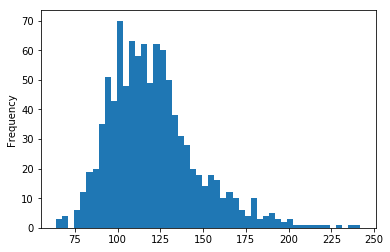

In [13]:
filmes.duration.plot(kind='hist', bins=50)

In [7]:
import cufflinks as cf
from plotly.offline import iplot

In [14]:
cf.go_offline()
filmes.duration.iplot(kind='hist', bins=50)

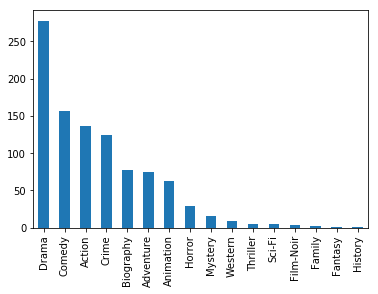

In [15]:
filmes.genero.value_counts().plot(kind='bar')

In [16]:
filmes.genre.value_counts().iplot(kind='bar')

In [17]:
py.init_notebook_mode(connected=True)

In [21]:
data = [go.Bar(x=filmes.genre.value_counts().index,
               y=filmes.genre.value_counts().values
              )
       ]

layout = go.Layout(title='Teste',
                   xaxis={'title':'Genero'},
                   yaxis={'title':'Quantidade',
                          'range':[0,max(filmes.genre.value_counts().values) * 1.10]
                         }
                  )

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)